In [1]:
import pandas as pd
import os
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

First, we create a dataset based on the path of the FER-2013 Dataset

In [2]:
dataframe = pd.DataFrame(columns=['pth', 'label'])
dataframe

,pth,label


In [3]:

folder_path = "fer-2013 dataset"  # Replace with the actual folder path
folder_path = os.path.join(folder_path, "test")
# happy, sad, angry, and neutral
for emotion in os.listdir(folder_path):
    if emotion not in ["happy", "sad", "angry", "neutral"]:
        continue
    emotion_folder = os.path.join(folder_path, emotion)
    for image in os.listdir(emotion_folder):
        image_path = os.path.join(emotion_folder, image)
        row = {'pth': image_path, 'label': emotion}
        dataframe = pd.concat([dataframe, pd.DataFrame(row, index=[0])], ignore_index=True)
        


In [4]:
dataframe.head(10)

,pth,label
0,fer-2013 dataset\test\angry\PrivateTest_101313...,angry
1,fer-2013 dataset\test\angry\PrivateTest_103044...,angry
2,fer-2013 dataset\test\angry\PrivateTest_105452...,angry
3,fer-2013 dataset\test\angry\PrivateTest_105900...,angry
4,fer-2013 dataset\test\angry\PrivateTest_110999...,angry
5,fer-2013 dataset\test\angry\PrivateTest_112969...,angry
6,fer-2013 dataset\test\angry\PrivateTest_120006...,angry
7,fer-2013 dataset\test\angry\PrivateTest_120083...,angry
8,fer-2013 dataset\test\angry\PrivateTest_121917...,angry
9,fer-2013 dataset\test\angry\PrivateTest_122182...,angry


In [5]:
dataframe.tail(10)

,pth,label
5202,fer-2013 dataset\test\sad\PublicTest_99123958.jpg,sad
5203,fer-2013 dataset\test\sad\PublicTest_99393604.jpg,sad
5204,fer-2013 dataset\test\sad\PublicTest_99446207.jpg,sad
5205,fer-2013 dataset\test\sad\PublicTest_99484077.jpg,sad
5206,fer-2013 dataset\test\sad\PublicTest_99573433.jpg,sad
5207,fer-2013 dataset\test\sad\PublicTest_99654006.jpg,sad
5208,fer-2013 dataset\test\sad\PublicTest_9967827.jpg,sad
5209,fer-2013 dataset\test\sad\PublicTest_99688200.jpg,sad
5210,fer-2013 dataset\test\sad\PublicTest_99741160.jpg,sad
5211,fer-2013 dataset\test\sad\PublicTest_99767171.jpg,sad


In [6]:

def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.5743138790130615, y=0.6889077425003052, z=-0.0757405161857605, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5861771702766418, y=0.6081040501594543, z=-0.11635051667690277, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5806379318237305, y=0.6360802054405212, z=-0.06825906038284302, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5728011727333069, y=0.5384976863861084, z=-0.07820826768875122, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5886233448982239, y=0.5850725769996643, z=-0.12065678834915161, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5904492139816284, y=0.5581714510917664, z=-0.10794224590063095, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5934493541717529, y=0.49504899978637695, z=-0.0367915965616703, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.43090513348579407, y=0.47988396883010864, z=0.03688709810376167, visibility=0.0, presence=0.0), NormalizedLandmark

(-0.5, 942.5, 942.5, -0.5)

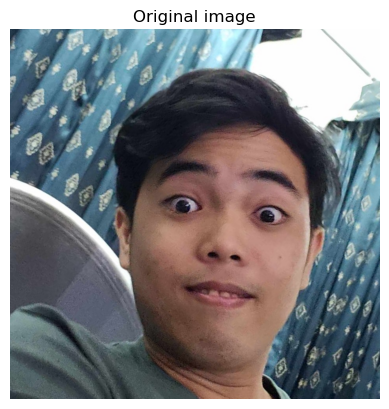

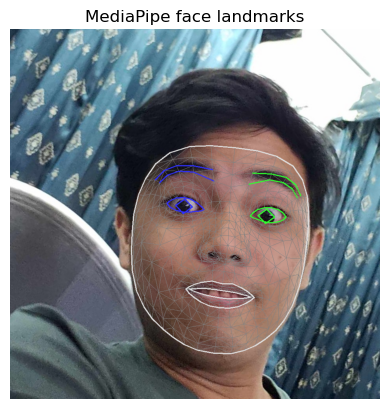

In [7]:
#Model Setup
BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)

#Test the model
detector2 = vision.FaceLandmarker.create_from_options(options)               
image = mp.Image.create_from_file("./mediapipe_test.jpg")
detection_result = detector2.detect(image) #this is the line

annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
print(detection_result)
#original image
plt.figure()
plt.imshow(image.numpy_view())
plt.title('Original image')
plt.axis('off')
#annotated image
plt.figure()
plt.imshow(annotated_image)
plt.title('MediaPipe face landmarks')
plt.axis('off')

#display the resulting coordinates of each landmark

In [8]:
i = 0
# add a 'landmarks' column to the dataframe
dataframe['landmarks'] = None
rows_to_drop = []
for idx, row in dataframe.iterrows():
    face_img = mp.Image.create_from_file(row['pth'])
    detection_result = detector2.detect(face_img)
    
    #if no face detected, drop the row
    if len(detection_result.face_landmarks) <= 0:
        rows_to_drop.append(idx)
        continue
    #turn it into a list of tuples with the x, y, z coordinates
    dataframe.at[idx, 'landmarks'] = [ (landmark.x, landmark.y, landmark.z) for landmark in detection_result.face_landmarks[0] ]

dataframe.drop(index=rows_to_drop, inplace=True)


In [11]:
dataframe.reset_index(drop=True, inplace=True)

In [12]:
dataframe.tail(10)

,pth,label,landmarks
5195,fer-2013 dataset\test\sad\PublicTest_99123958.jpg,sad,"[(0.5784841179847717, 0.6880919337272644, -0.0..."
5196,fer-2013 dataset\test\sad\PublicTest_99393604.jpg,sad,"[(0.5810617804527283, 0.6880291700363159, -0.0..."
5197,fer-2013 dataset\test\sad\PublicTest_99446207.jpg,sad,"[(0.5849206447601318, 0.6939587593078613, -0.0..."
5198,fer-2013 dataset\test\sad\PublicTest_99484077.jpg,sad,"[(0.5923125147819519, 0.6878997087478638, -0.0..."
5199,fer-2013 dataset\test\sad\PublicTest_99573433.jpg,sad,"[(0.5910741686820984, 0.7005317807197571, -0.0..."
5200,fer-2013 dataset\test\sad\PublicTest_99654006.jpg,sad,"[(0.5825851559638977, 0.6851295828819275, -0.0..."
5201,fer-2013 dataset\test\sad\PublicTest_9967827.jpg,sad,"[(0.593130886554718, 0.6934587359428406, -0.05..."
5202,fer-2013 dataset\test\sad\PublicTest_99688200.jpg,sad,"[(0.5835974216461182, 0.6945403218269348, -0.0..."
5203,fer-2013 dataset\test\sad\PublicTest_99741160.jpg,sad,"[(0.5856831073760986, 0.6956832408905029, -0.0..."
5204,fer-2013 dataset\test\sad\PublicTest_99767171.jpg,sad,"[(0.58956378698349, 0.6895386576652527, -0.062..."


In [13]:
# Extract x, y, and z coordinates from the tuples in the 'landmarks' column
coordinates = dataframe['landmarks'].apply(lambda x: [coord for landmark in x for coord in landmark])

# Create a DataFrame from the extracted coordinates
landmarks_df = pd.DataFrame(coordinates.tolist(), columns=[f'lm_{i+1}_{coord}' for i in range(len(coordinates.iloc[0]) // 3) for coord in ['x', 'y', 'z']])

# Concatenate the original DataFrame with the new landmarks DataFrame
dataframe = pd.concat([dataframe, landmarks_df], axis=1)

# Drop the original 'landmarks' column
dataframe.drop(columns=['landmarks'], inplace=True)
dataframe.head()

,pth,label,lm_1_x,lm_1_y,lm_1_z,lm_2_x,lm_2_y,lm_2_z,lm_3_x,lm_3_y,...,lm_475_z,lm_476_x,lm_476_y,lm_476_z,lm_477_x,lm_477_y,lm_477_z,lm_478_x,lm_478_y,lm_478_z
0,fer-2013 dataset\test\angry\PrivateTest_101313...,angry,0.585703,0.688364,-0.064108,0.604407,0.611852,-0.107075,0.595475,0.637442,...,0.026336,0.726661,0.504794,0.026334,0.703628,0.516170,0.026315,0.721237,0.535993,0.026317
1,fer-2013 dataset\test\angry\PrivateTest_103044...,angry,0.585008,0.693179,-0.064470,0.596085,0.613974,-0.101272,0.591876,0.642826,...,0.033707,0.681771,0.432235,0.033705,0.661421,0.445278,0.033684,0.682200,0.460805,0.033689
2,fer-2013 dataset\test\angry\PrivateTest_105452...,angry,0.582581,0.685064,-0.059101,0.596868,0.605721,-0.101935,0.591620,0.633278,...,0.029698,0.700579,0.476738,0.029697,0.679697,0.492102,0.029677,0.697872,0.511779,0.029680
3,fer-2013 dataset\test\angry\PrivateTest_105900...,angry,0.579330,0.688271,-0.064327,0.597474,0.610252,-0.108215,0.590104,0.634638,...,0.027570,0.720929,0.483828,0.027570,0.697731,0.498512,0.027548,0.717202,0.519426,0.027551
4,fer-2013 dataset\test\angry\PrivateTest_110999...,angry,0.585355,0.691295,-0.061211,0.605442,0.622365,-0.103344,0.599030,0.644038,...,0.026568,0.706235,0.494809,0.026567,0.685281,0.509824,0.026547,0.704477,0.529498,0.026551


In [14]:
dataframe.tail(5)

,pth,label,lm_1_x,lm_1_y,lm_1_z,lm_2_x,lm_2_y,lm_2_z,lm_3_x,lm_3_y,...,lm_475_z,lm_476_x,lm_476_y,lm_476_z,lm_477_x,lm_477_y,lm_477_z,lm_478_x,lm_478_y,lm_478_z
5200,fer-2013 dataset\test\sad\PublicTest_99654006.jpg,sad,0.582585,0.685130,-0.066740,0.598686,0.606514,-0.110112,0.590893,0.634250,...,0.028132,0.743373,0.510432,0.028127,0.718560,0.522134,0.028108,0.735533,0.542225,0.028111
5201,fer-2013 dataset\test\sad\PublicTest_9967827.jpg,sad,0.593131,0.693459,-0.059069,0.606269,0.618516,-0.103239,0.600502,0.639852,...,0.028212,0.724257,0.491845,0.028209,0.700514,0.506898,0.028192,0.719722,0.528115,0.028195
5202,fer-2013 dataset\test\sad\PublicTest_99688200.jpg,sad,0.583597,0.694540,-0.063221,0.584215,0.606533,-0.098192,0.586159,0.634571,...,0.009698,0.328133,0.328824,0.009691,0.308780,0.342483,0.009673,0.330519,0.358864,0.009677
5203,fer-2013 dataset\test\sad\PublicTest_99741160.jpg,sad,0.585683,0.695683,-0.061210,0.593497,0.605562,-0.102624,0.590597,0.634663,...,0.029760,0.627207,0.359987,0.029751,0.607226,0.372077,0.029736,0.628194,0.387624,0.029740
5204,fer-2013 dataset\test\sad\PublicTest_99767171.jpg,sad,0.589564,0.689539,-0.062930,0.608842,0.607435,-0.104505,0.602801,0.635038,...,0.024499,0.381933,0.328869,0.024492,0.360753,0.339229,0.024474,0.372650,0.359347,0.024477


In [16]:
dataframe.to_csv('./outputs/fer2013-set.csv', index=False, header=True, encoding='utf-8')